In [30]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def get_lower_tri_heatmap(df, output="cooc_matrix.png"):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("Spearman Correlaton Coeffient Heat Map")
    # save to file
    fig = sns_plot.get_figure()
    fig.savefig(output)

In [31]:

raw = pd.read_csv("./backtest/rawData_Feb11.csv", index_col= 0 )
del raw['VXUS']
raw.head()

,RAY,VIX,QQQ,T10Y3M,CL1,HG1,GC1,XAG,VNQ,EURtoUSD,EEM
Date,,,,,,,,,,,
1990-01-02,200.241,17.24,NaN,0.11,NaN,NaN,NaN,NaN,NaN,1.2146,NaN
1990-01-03,200.116,18.19,NaN,0.10,NaN,NaN,NaN,NaN,NaN,1.2096,NaN
1990-01-04,198.646,19.22,NaN,0.14,NaN,NaN,NaN,NaN,NaN,1.2287,NaN
1990-01-05,196.850,20.11,NaN,0.20,NaN,NaN,NaN,NaN,NaN,1.2358,NaN
1990-01-08,197.525,20.26,NaN,0.23,NaN,NaN,NaN,NaN,NaN,1.2452,NaN


In [32]:
raw.shape

(8379, 11)

In [33]:
spcorr_raw = raw.corr('spearman')
spcorr_raw

,RAY,VIX,QQQ,T10Y3M,CL1,HG1,GC1,XAG,VNQ,EURtoUSD,EEM
RAY,1.000000,-0.117036,0.949101,-0.332370,0.644097,0.627772,0.695502,0.759713,0.925785,-0.178604,0.599151
VIX,-0.117036,1.000000,-0.242315,0.020474,-0.067358,-0.202088,-0.190141,-0.101621,-0.354783,-0.145917,0.051802
QQQ,0.949101,-0.242315,1.000000,-0.436157,0.158397,0.405147,0.669259,0.559698,0.843064,-0.181127,0.628337
T10Y3M,-0.332370,0.020474,-0.436157,1.000000,0.077068,-0.027555,-0.000954,-0.051405,-0.542483,0.253195,-0.174100
CL1,0.644097,-0.067358,0.158397,0.077068,1.000000,0.850060,0.749819,0.794894,-0.368287,0.431157,0.498440
HG1,0.627772,-0.202088,0.405147,-0.027555,0.850060,1.000000,0.890627,0.868897,0.016420,0.540538,0.773962
GC1,0.695502,-0.190141,0.669259,-0.000954,0.749819,0.890627,1.000000,0.912329,0.414114,0.353996,0.661141
XAG,0.759713,-0.101621,0.559698,-0.051405,0.794894,0.868897,0.912329,1.000000,0.141427,0.295923,0.675242
VNQ,0.925785,-0.354783,0.843064,-0.542483,-0.368287,0.016420,0.414114,0.141427,1.000000,-0.697425,0.375123
EURtoUSD,-0.178604,-0.145917,-0.181127,0.253195,0.431157,0.540538,0.353996,0.295923,-0.697425,1.000000,0.163787


<ipython-input-30-35f1b5add620>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


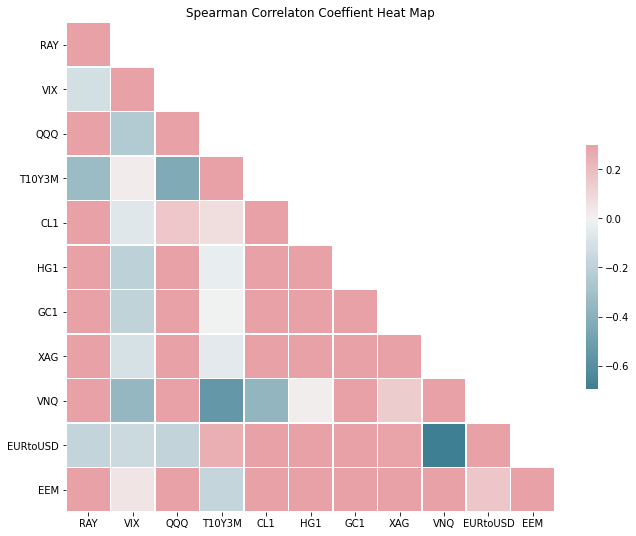

In [34]:
get_lower_tri_heatmap(spcorr_raw)